
# Project: Investigate a Dataset - [IMDB Movies Investigation]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

> Columns ending in '_adj' show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> Season column is used to show the season of the year the film was released in. For simplicity, each 3 monnths correspond to a season i.e. December, January and February are considered the Winter season, fom March to May is Spring and so on.

> We have introduced new rows and data frames and explained their usage while at the process.


### Question(s) for Analysis
> **Our 2 main questions will be:**

> 1- How do different parameters affect the average rating (vote) ?

> 2- How does the return on investment rate (ROI) change with different parameters ?

In [229]:
#This code is to summon all the libraries we will use, last line is to make our visualizations 
#appear inside the notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [230]:
#This code is to read the data set into a dataframe,the second line shows the first 5 rows of the dataframe.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Here we can have an eagle view on the data set, apparently we have more columns than we need for the purposes of this analysis. From the first look I would say that id, imdb_id, homepage and overview columns are of no use for me.

In [231]:
#This code check null values in each columns and counts them
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here we can see that some of the columns have missing values some of them can be managed and some others miss a lot of data like the production_companies column which is missing about 10% of the data. At this point, we are sure that we will drop the homepage column especially.

In [232]:
#This code gives us indormation about each column data types alongside with non null values count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Most of the data types here are suitable maybe except for imdb_id we need to change that from string to integer if we wish to include it in any analysis.

In [233]:
#This code shows us some stastistics about the column's distribution
df.popularity.describe()

count    10866.000000
mean         0.646441
std          1.000185
min          0.000065
25%          0.207583
50%          0.383856
75%          0.713817
max         32.985763
Name: popularity, dtype: float64

I want to check the popularity to see if it's going to be of any use to me for the analysis. I haven't found enough documentation for the column so I am exploring it myself. 
The mean is way below the max value so I am expecting an outlier here.

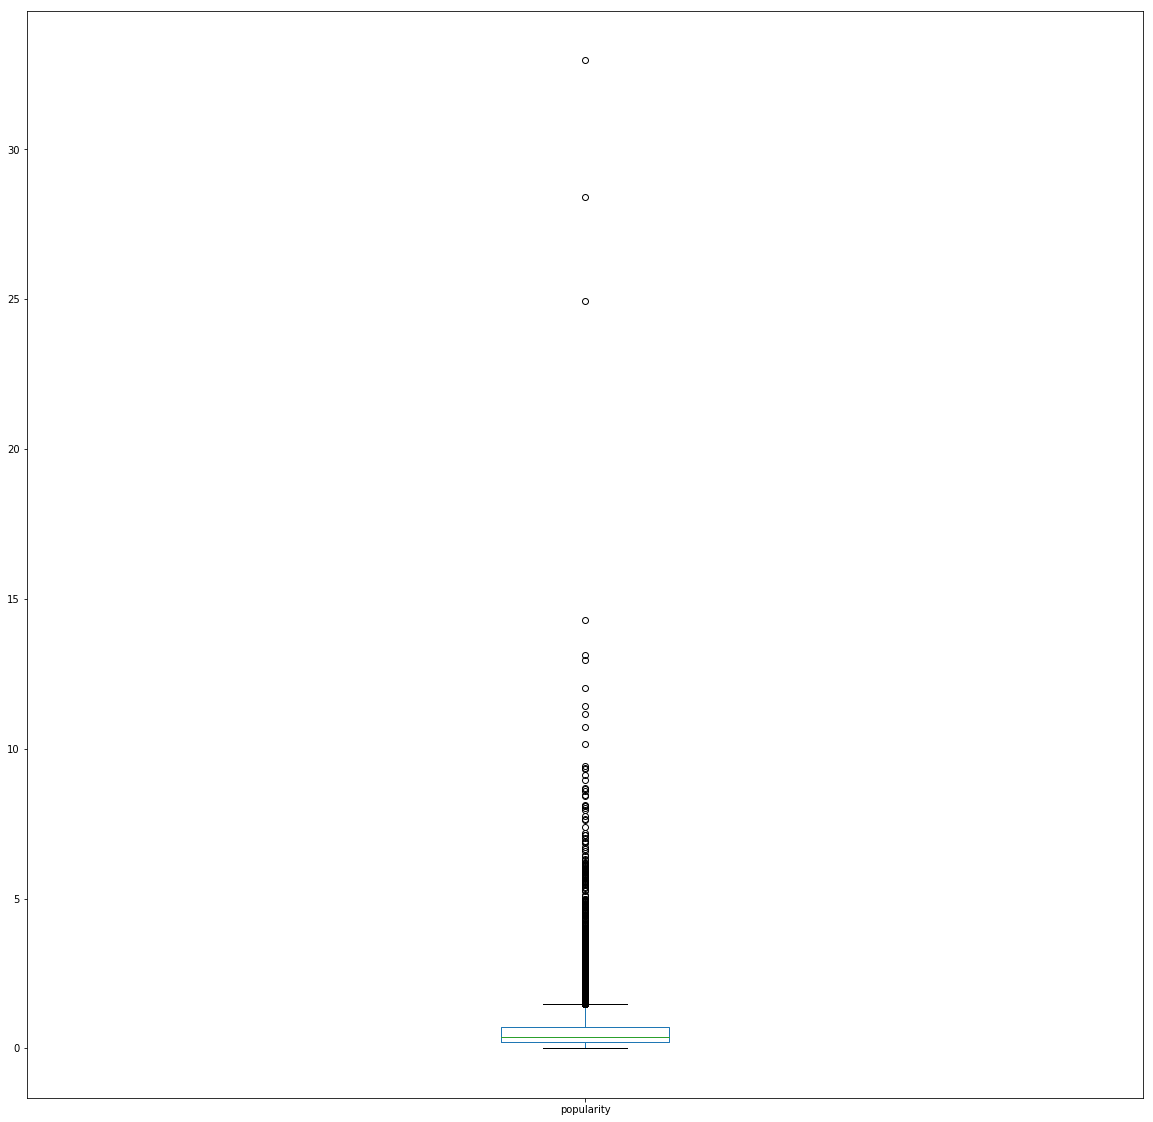

In [234]:
#This line plots a box plot of popularity column and let's us set a size.
df.popularity.plot(kind='box',figsize=(20,20));

As expected we found some outliers that caused the max value to be that high, we also don't have much information about the scale of this column so it's of no use as well.


### Data Cleaning

In [235]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

First of all let's drop the columns that we don't need. I made this function as I drop columns multiple times along the way so why not make it easier ?

In [236]:
def remove_col(x):
    #The function takes the columns we need to remove and returns the new data frame
    # Args:
    # x: the columns we need to drop
    # return: new data frame
    df1=df.drop(columns=x)
    return df1

In [237]:
#here we are calling our function.
df= remove_col({'id','imdb_id','popularity','homepage','budget_adj','revenue_adj','tagline'})
#may show an error that these columns can't be found, I just ran the cel twice :D. Check next cell.

In [238]:
df.head()
#checking our changes

,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


I Wanted to confirm that the changes have been applied and to have a second look, turned out useful as I forgot to drop overview column.

In [239]:
#Calling function again
df= remove_col({'overview'})
df.head()

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


I thought of a way to dodge the effect of change of dollar value by year so I will introduce a column called ROI ( Return on Investment) which is equal to revenue / budget.

In [240]:
#This line creates a new column from the product of division of these 2 columns, then we check our changes.
df['roi']= df['revenue'] / df['budget']
df.head()

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,roi
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,10.090192
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,2.522909
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.683984
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,10.340891
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,7.927628


Also, changing the release date to correspond a season of the year would make more sense as the release date in itself is less helpful when we have a release year column.

In [241]:
#Here, we split each entry in the release_date column by / and keeps characters before the first separator only
df['release_date']=df['release_date'].apply(lambda x:x.split('/')[0])

In [242]:
df.head()
#checking changes

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,roi
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.5,2015,10.090192
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5,6185,7.1,2015,2.522909
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3,2480,6.3,2015,2.683984
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12,5292,7.5,2015,10.340891
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4,2947,7.3,2015,7.927628


In [243]:
df.info()
#checking column count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
roi                     6165 non-null float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


We can see here 2 sounding issues, the first one is the type of release_date column. I need it to be an int as I want to cut it into bins containing season.
The second one is that the roi column has many null values which we don't know why but we will inpect further to clean this.

In [244]:
#This line replaces every '12' entry we have with a '0', thenwe check results.
df['release_date']=df['release_date'].replace('12','0')
df['release_date']

0         6
1         5
2         3
3         0
4         4
5         0
6         6
7         9
8         6
9         6
10       10
11        2
12        1
13        7
14        4
15        0
16        1
17        7
18        3
19       11
20        5
21        6
22        5
23        2
24        0
25        7
26        6
27        1
28       11
29        9
         ..
10836     1
10837     6
10838    11
10839    10
10840     0
10841    10
10842     1
10843     6
10844     1
10845     3
10846     1
10847     6
10848     8
10849     0
10850     2
10851     6
10852     5
10853     3
10854     2
10855     1
10856     2
10857     6
10858     5
10859    10
10860     5
10861     6
10862     0
10863     1
10864    11
10865    11
Name: release_date, Length: 10866, dtype: object

Here we need to bin the values of the months to correspond a season of the year so I needed to change month 12 to 0 to be able to bin it with months 1 and 2 in the bin 'winter'. We put the values in quotes as they are type string not int yet.

In [245]:
#This line of code let's us change the type of our column.
df['release_date']=df['release_date'].astype({'release_date':'int64'})

Now, we are creating our bins supposing that each 3 months correspond to a season, months 12,1 and 2 correspond to winter and so forth.

In [246]:
#This is a very helpful line code that let's us cut our entries into bins which we set their limits (edges) and labels.
bin_edges = [-1,2,5,8,11]
bin_labels= ["winter",'spring','summer','fall']
df['release_date']=pd.cut(df['release_date'],bin_edges,labels=bin_labels)
df['release_date']

0        summer
1        spring
2        spring
3        winter
4        spring
5        winter
6        summer
7          fall
8        summer
9        summer
10         fall
11       winter
12       winter
13       summer
14       spring
15       winter
16       winter
17       summer
18       spring
19         fall
20       spring
21       summer
22       spring
23       winter
24       winter
25       summer
26       summer
27       winter
28         fall
29         fall
          ...  
10836    winter
10837    summer
10838      fall
10839      fall
10840    winter
10841      fall
10842    winter
10843    summer
10844    winter
10845    spring
10846    winter
10847    summer
10848    summer
10849    winter
10850    winter
10851    summer
10852    spring
10853    spring
10854    winter
10855    winter
10856    winter
10857    summer
10858    spring
10859      fall
10860    spring
10861    summer
10862    winter
10863    winter
10864      fall
10865      fall
Name: release_date, Leng

In [247]:
df.head()
#Result check

,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,roi
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,summer,5562,6.5,2015,10.090192
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,spring,6185,7.1,2015,2.522909
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,spring,2480,6.3,2015,2.683984
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,winter,5292,7.5,2015,10.340891
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,spring,2947,7.3,2015,7.927628


In [248]:
#Now we rename our column to match the new data using the rename method which takes the old name to replace it with the new one.
df.rename(columns={'release_date':'season'},inplace=True)

In [249]:
df.describe()
# This is to have a look at our numerical data

,budget,revenue,runtime,vote_count,vote_average,release_year,roi
count,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,6165.000000
mean,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,inf
std,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,NaN
min,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000
25%,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.138804
50%,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,1.898151
75%,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,6.788662
max,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,inf


Now, we are adressing the second issue which is the roi. We can see that the mex value is infinity and that's because of the division by zero so we are going to remove rows that contain zero in the budget. It makes sense because no movie can have a budget of zero so it's inaccurate information.

In [250]:
#This line is to slice the dataframe to exclude entries in budget column which are equal to zero.
df =df[df.budget !=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5170 entries, 0 to 10865
Data columns (total 14 columns):
budget                  5170 non-null int64
revenue                 5170 non-null int64
original_title          5170 non-null object
cast                    5159 non-null object
director                5166 non-null object
keywords                4839 non-null object
runtime                 5170 non-null int64
genres                  5169 non-null object
production_companies    5034 non-null object
season                  5170 non-null category
vote_count              5170 non-null int64
vote_average            5170 non-null float64
release_year            5170 non-null int64
roi                     5170 non-null float64
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 570.7+ KB


Now we need to drop the keywords column as I know am not going to use it for this analysis by now. We can drop other columns as well but they maybe of some help in the analysis.

In [251]:
#Calling our column deletion function
df = remove_col({'keywords'})

We will explore duplicates

In [252]:
#This line checks for duplicate rows then counts them
df.duplicated().sum()

1

Only 1 duplicate entry which we can reove.

In [253]:
#This code deletes the duplicate rows, we then check for application, inplace applies the changes to the original
#dataframe directly, we will use it many time in our analysis.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

We are going to deal with the Nans now as the last step in data cleaning phase. All of the columns that need filling are strings and have very low number of NaN values so I believe dropping the rows would be ok. ( there are better ways of course but they are not numbers for example to fill with the mean, so I though about filling them with the mode but saw that deleting the rows would be more accurate)

In [254]:
#This line deletes rows that have NaNs as values.
df.dropna(inplace=True)

In [255]:
df.info()
#to check changes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5021 entries, 0 to 10865
Data columns (total 13 columns):
budget                  5021 non-null int64
revenue                 5021 non-null int64
original_title          5021 non-null object
cast                    5021 non-null object
director                5021 non-null object
runtime                 5021 non-null int64
genres                  5021 non-null object
production_companies    5021 non-null object
season                  5021 non-null category
vote_count              5021 non-null int64
vote_average            5021 non-null float64
release_year            5021 non-null int64
roi                     5021 non-null float64
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 515.0+ KB


I believe now we are ready to analyze

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How does vote change with different parameter)

Let's first explore our vote change with season

In [256]:
#This is a dataframe that contains average vote scores of 7+ in case we need it.
highest = df.query("vote_average >=7")
highest.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,season,vote_count,vote_average,release_year,roi
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,spring,6185,7.1,2015,2.522909
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,winter,5292,7.5,2015,10.340891
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,spring,2947,7.3,2015,7.927628
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,winter,3929,7.2,2015,3.947782
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,fall,4572,7.6,2015,5.512781


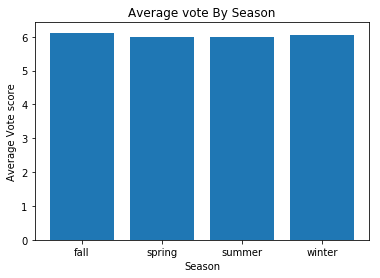

In [257]:
#Here we need to get the average vote scores per each season of the year
dat=df.groupby('season').mean()['vote_average']
plt.bar(dat.index,dat)
plt.xlabel('Season')
plt.ylabel('Average Vote score')
plt.title('Average vote By Season');

We hereby see that movies that are released in fall tend to have higher vote average. Now wil check the average vote against the runtime.

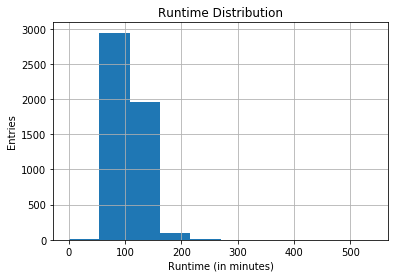

In [258]:
#This code plots the runtime column data in a histogram and let's us set different labels
df['runtime'].hist()
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Entries')
plt.title('Runtime Distribution');

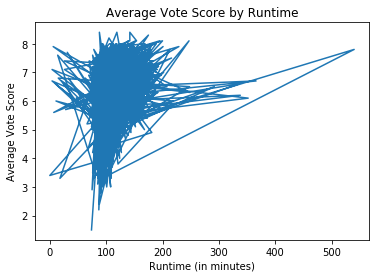

In [259]:
#This code plots the relation between runtime and vote average columns in a line chart and let's us set different labels

plt.plot(df['runtime'],df['vote_average'])
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Average Vote Score')
plt.title('Average Vote Score by Runtime');

There apears to be no correlation between runtime and average vote score. Now, we will explore the vote against roi.

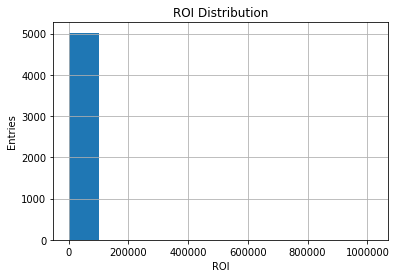

In [260]:
#This code plots the roi column data in a histogram and let's us set different labels
df['roi'].hist();
plt.xlabel('ROI')
plt.ylabel('Entries')
plt.title('ROI Distribution');

We notice here that the scale is very big which impliers presence of an outlier so let's explore more.

In [261]:
#Here we want to see the data related with a specific roi entry so we use query method.
df.query('roi == 1018619.2831858407')

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,season,vote_count,vote_average,release_year,roi
10495,113,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,summer,211,5.8,1986,1.018619e+06


In [262]:
#This here is data frame contains movies with budgets 50k or higher explained further in the next cell.
df1=df.query('budget >= 50000')
print(df1.describe())
#This cell gives us the dimensions of our data frame
df1.shape

             budget       revenue      runtime   vote_count  vote_average  \
count  4.943000e+03  4.943000e+03  4943.000000  4943.000000   4943.000000   
mean   3.198607e+07  8.376606e+07   107.647380   425.452357      6.046632   
std    3.931482e+07  1.621671e+08    22.216551   801.930592      0.863770   
min    5.000000e+04  0.000000e+00     0.000000    10.000000      2.200000   
25%    7.000000e+06  7.576250e+04    94.000000    41.000000      5.500000   
50%    1.900000e+07  2.418578e+07   103.000000   134.000000      6.100000   
75%    4.000000e+07  9.501011e+07   117.000000   426.000000      6.600000   
max    4.250000e+08  2.781506e+09   540.000000  9767.000000      8.400000   

       release_year          roi  
count   4943.000000  4943.000000  
mean    2001.175197     3.706181  
std       11.785314    15.125213  
min     1960.000000     0.000000  
25%     1995.000000     0.015476  
50%     2004.000000     1.296296  
75%     2010.000000     3.309918  
max     2015.000000   439.

(4943, 13)

While we have a very high variety and standard deviation, I checked a random sample of the data and they appear to be true so I chose to proceed with results having budget > 50,000 to drop the illogically low budgets. 

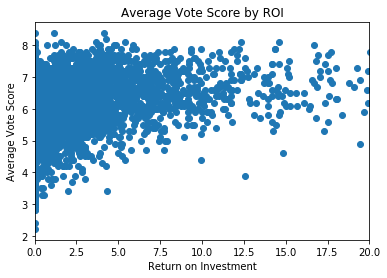

In [263]:
#This code plots the relation between roi and vote average columns and let's us set different labels
plt.scatter(df1['roi'],df1['vote_average'])
plt.xlabel('Return on Investment')
plt.ylabel('Average Vote Score')
plt.title('Average Vote Score by ROI')
plt.xlim(0,20);

We limited the scale here to be able to get a broader view of the vast majority of scores, apparently there is no correlation between the average vote score of a movie and the ROI it brings.

In [264]:
#This line let's us see the number of unique directors in the director column
df['director'].nunique()

2299

In [265]:
#Here we make a list for directors with movies rating 7 or higher.
dir_data=highest['director'].value_counts()[:5]

I thought of analysing the directors whose movies are ranked highest. There are 2 approaches here, the first is to look at the average score a director gets on his movies but this can be misleading if a director has only 1 movie in the database so its score will reflect falsely the director's average score. So, I chose the second approach which is to look at directors who have the most high scoring movies.

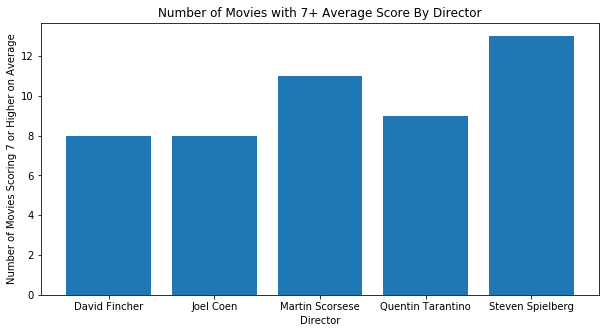

In [266]:
#This plot shows the top 5 directors which have the highest number of highly rated movies.
ax=plt.subplots(figsize=(10,5))
plt.bar(dir_data.index,dir_data);
plt.xlabel("Director")
plt.ylabel('Number of Movies Scoring 7 or Higher on Average')
plt.title('Number of Movies with 7+ Average Score By Director');


### Research Question 2  (How does the ROI change with different parameters)

Let's first explore the effect of budget change on the roi

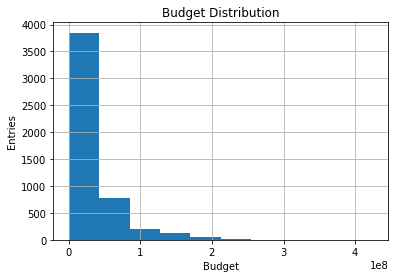

In [267]:
#This code plots the distribution of the budget column data in a histogram and let's us set different labels
df['budget'].hist()
plt.xlabel('Budget')
plt.ylabel('Entries')
plt.title('Budget Distribution');

Apparently the distribution of the budgets is right skewed which means that most of our movies are of budget < 100M.

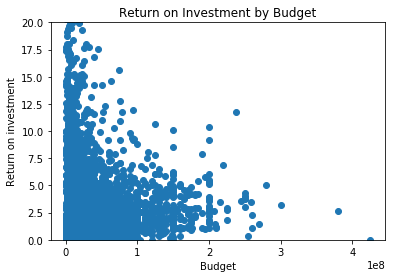

In [268]:
#This code plots the relation between budget and the roi of the movies and let's us set different labels

plt.scatter(df['budget'],df['roi'])
plt.xlabel('Budget')
plt.ylabel('Return on investment')
plt.title('Return on Investment by Budget')
plt.ylim(0,20);


We have also trimmed the output here to have a better look and it appears that the budget has no correlation with the roi.

Now we are going to explore the return on investment against the runtime.

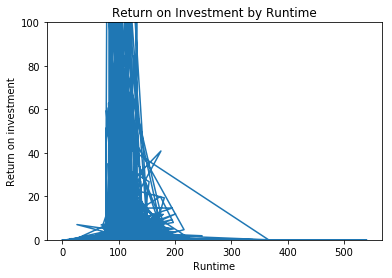

In [269]:
#This code plots the relation between runtime and the roi of the movies and let's us set different labels
plt.plot(df['runtime'],df['roi'])
plt.xlabel('Runtime')
plt.ylabel('Return on investment')
plt.title('Return on Investment by Runtime')
plt.ylim(0,100);

The return on investment doesn't correlate to the runtime. 

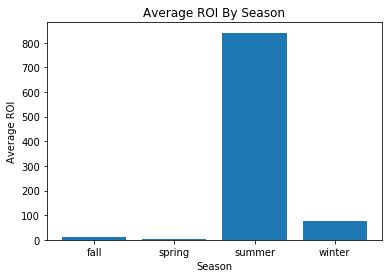

In [270]:
#We need to get data about seasons of the year regarding their average roi, then we plot it
data_roi=df.groupby('season').mean()['roi']
plt.bar(data_roi.index,data_roi)
plt.xlabel('Season')
plt.ylabel('Average ROI')
plt.title('Average ROI By Season');

Here, we can see that movies which are released in summer tend to get a way higher return on investment.

Next we need to get the highest ROIs to see which directors usually get higher ROIs. I chose to see the top 25%.

In [271]:
#Checking column statistics
df['roi'].describe()

count    5.021000e+03
mean     2.287486e+02
std      1.440567e+04
min      0.000000e+00
25%      5.375167e-03
50%      1.280454e+00
75%      3.325604e+00
max      1.018619e+06
Name: roi, dtype: float64

In [272]:
#We want here to get the data of the top 25% of our ROIs
dir_roi= df.query('roi >= 3.324332')['director'].value_counts()[:5]
dir_roi

Steven Spielberg     19
Clint Eastwood       12
Woody Allen          10
Robert Zemeckis       8
Quentin Tarantino     7
Name: director, dtype: int64

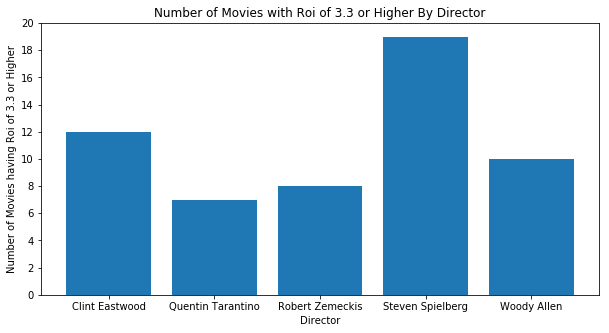

In [273]:
#This plot shows the top 5 directors which have the highest number of movies with roi of 3.3 or higher.
ax=plt.subplots(figsize=(10,5))
plt.bar(dir_roi.index,dir_roi)
plt.xlabel("Director")
plt.ylabel('Number of Movies having Roi of 3.3 or Higher')
plt.title('Number of Movies with Roi of 3.3 or Higher By Director');
plt.ylim(0,20)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20]);

Finally, we can see that again Spielberg's movies have high tendency to bring a revenue 3 times or more higher than the budget.

<a id='conclusions'></a>
## Conclusions

#### How does the average vote score change with different parameters :

> Movies which are released in fall have a slightly higher tendency to get a higher vote score.

> Having high budget doesn't necessarily mean that the film will get a high vote.

> The movie runtime is not directly correlated to the average vote score.

> Directors like Steven Spielberg and Martin Scorsese have the highest numbers of highly rated movies.


#### How does the return on investment rate ( ROI ) change with different parameters :

> Movies released in summer have the highest tendency to bring a high return on investment.

> Opposing the general thought, having a high  budget doesn't guarantee a high profit for a movie.

> Runtime doesn't affect the financial success of a movie.

> If you want to produce a movie, Spielberg is your man. He is the director with the most movies of ROI 3.3 or higher.


### Limitations
> We can't say for sure that the directors we mentioned are the best as we relied in our analysis on number of movies with high ROI and rating. another approach could be to look at directors with the highest percentage of successful movies. in order to do that we need to have data for a certain number of movies per director.

> Unifying the number of movies per director in this dataset was not possible as we have many directors who just have one entry.

> The analysis included is to best explain the data at hand, the stastistical exploration done here is by no means inferential. Predicting outcomes would need different and in depth stastistical operations and machine learning.


In [274]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0